In [7]:
%pip install matplotlib
%pip install pyserial

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import serial
import time
import csv

In [8]:
voltage_a_rms_array = [873,1153,990,1155,1170,1191,1217,1260,1191,1263,1170,1272,1166,1280,1153,1276,1166,1176,1206,1148,1182,1160,1191,1196,1220,1229,1222,1243,1183,1245,1146,1249,1115,1248,1078,1246,1014,1243,912,1232,810,1213,733,1195,749,1191,758,1182,1239,1232,1224,1229,1234,1224,1231,1229,1224,1225,1229,1229,1207,1224,1198,1228,913,1224,1207,1224,1191,1232,1183,1228,1167,1231,1162,1191,1224,1255,1234,1260,1245,1243,1263,1225,1271,1213,1271,1196,1255,1185,1254,1178,1248,1173,1250,1160,1246,1160,1245,1151,1245,1148,1157,767,1155,771,1148,762,1143,769,1134,766,1130,770,1129,770,1118,766,1116,769,1116,766,1115,766,1107,766,1107,766,1116,771,1122,762,1126,1127,1268,1117,1257,1097,1255,1078,1246,1063,1248,1043,1243,1026,1245,1011,1234,985,1234,959,1231,939,1223,907,1219,877,1211,846,1198,823,1195,1199,1243,1231,1206,1250,1194,1268,1194,1260,1191,1243,1191,1232,1191,1223,1191,1222,1201,1219,1204,1219,1207,1220,1207,1224,1220,1206,1207,745,1206,780,1206,809,1204,829,1196,867,1198,894,1196,922,1185,939,1191,966,1183,1001,1183,1037,1183,1079,1191,1118,1191,1153,1186,1198,1194,749,1195,755,1186,749,1182,761,1182,765,1170,766,1170,767,1157,770,1157,771,1153,773,1153,771,1156,774,1148,773,1155,773,1153,772,1149,1236,1278,1219,1273,1207,1268,1195,1271,1185,1271,1170,1257,1156,1254,1143,1248,1136,1245,1133,1242,1108,1234,1094,1229,1087,1229,1082,1229,1191,1274,1178,1272,1170,1273,1167,1268,1157,1261,1159,1260,1156,1273,1148,1261,1156,1278,1153,1274,1155,1278,1157,1276,1160,1281,1178,1222,771,1141,771,1141,766,1137,769,1139,759,1131,759,1130,754,1126,745,1117,741,1117,736,1107,724,1103,721,1104,711,1100,710,1100,704,1097,693,1109,794,1103,771,1095,744,1083,714,1082,689,1067,689,1064,692,1063,694,1048,696,1048,706,1039,704,1034,710,1029,716,1022,720,1014,722,1017,1143,1108,1137,1108,1131,1116,1126,1107,1129,1116,1120,1117,1127,1122,1122,1117,1118,1118,1109,1116,1092,1122,1093,1125,1097,1120,1081,1159,1025,1157,1067,1167,1100,1160,1133,1160,1179,1173,1209,1182,1185,1196,1170,1211,1155,1204,1141,1204,1129,1195,1116,1191,1108,1185,1095,1122,765,1122,764,1126,767,1115,765,1107,764,1107,758,1104,765,1098,765,1095,762,1095,765,1088,761,1087,763,1089,762,1083,765,1091,762,1087,980,1093,969,1087,966,1081,948,1081,937,1076,923,1078,913,1074,891,1067,873,1067,860,1064,834,1053,822,1053,794,1042,769,1037,740,1031,714,1283,1155,1281,1155,1274,1146,1263,1143,1261,1141,1260,1155,1186,1182,1156,1206,1145,1219,1143,1206,1141,1186,1137,1173,1141,1170,1141,1170,1196,745,1201,740,1201,735,1206,730,1206,757,1204,792,1207,819,1207,847,1204,882,1198,902,1191,922,1191,943,1182,975,1185,1004,1189,1043,1204,736,1202,739,1194,741,1191,746,1191,747,1182,756,1173,756,1173,759,1167,766,1160,765,1156,766,1167,767,1155,769,1156,771,1153,771,1156,1245,1261,1234,1259,1231,1259,1224,1259,1213,1260,1204,1260,1194,1259,1182,1255,1169,1245,1160,1245,1151,1250,1142,1243,1139,1245,1127,1243,1213,1269,1194,1260,1184,1257,1173,1243,1153,1234,1139,1232,1130,1220,1120,1209,1109,1206,1100,1194,1092,1201,1086,1199,1083,1204,1092,1204,780,1178,779,1173,774,1170,773,1167,779,1166,779,1160,774,1160,771,1155,765,1155,764,1151,755,1146,757,1146,756,1145,745,1143,740,1147,734,1261,1031,1249,1017,1249,987,1242,962,1236,939,1229,912,1224,884,1219,849,1217,829,1211,805,1211,779,1201,741,1195,729,1191,729,1185,734,1209,1260,1211,1245,1213,1237,1209,1229,1209,1224,1219,1225,1217,1220,1217,1222,1219,1229,1224,1228,1224,1232,1231,1239,1234,1231,1233,1220,1229,946,1220,973,1219,996,1211,1029,1206,1057,1209,1101,1207,1131,1204,1170,1209,1207,1219,1249,1222,1236,1236,1225,1263,1211,1260,1198,1170,762,1160,764,1157,766,1166,767,1153,771,1155,770,1148,771,1153,771,1143,773,1146,771,1153,770,1151,771,1146,773,1151,773,1143,773,1153,1160,1249,1160,1249,1143,1248,1131,1239,1126,1241,1109,1229,1101,1224,1088,1225,1081,1222,1074,1219,1063,1217,1045,1219,1025,1207,1004,1206,1170,1274,1166,1273,1155,1263,1153,1271,1151,1263,1145,1257,1139,1259,1134,1251,1138,1243,1140,1191,1155,1143,1182,1127,1194,1122,1185,1176,767,1183,769,1176,762,1176,764,1173,754,1182,747,1182,744,1183,737,1186,734,1189,725,1198,762,1196,808,1204,823,1198,860,1198,886,1201,852,1220,827,1219,795,1217,765,1207,740,1204,731,1191,735,1191,739,1191,744,1185,744,1182,749,1182,749,1175,755,1170,761,1170,765,1160,767,1156,1274,1268,1273,1261,1274,1268,1259,1262,1261,1263,1034,1254,1234,1260,1234,1263,1229,1259,1213,1250,1198,1248,1184,1239,1170,1245,1157,1209,1236,1213,1234,1223,1219,1255,1198,1249,1183,1243,1170,1232,1156,1229,1145,1219,1131,1206,1117,1204,1108,1196,1095,1186,1088,1185,1082,1167,773,1156,773,1153,772,1151,770,1148,770,1142,769,1140,769,1139,766,1131,766,1129,769,1129,769,1122,769,1122,766,1129,766,1127,758,1129,1107,1245,1087,1243,1074,1243,1053,1233,1032,1234,1014,1222,996,1219,973,1213,942,1209]
average_voltage_a_rms_array = []
time_in_ms = []
system_frequency = 60
seconds = 60
average_seconds = 5

average_samples = system_frequency * average_seconds
total_samples = system_frequency * seconds

In [3]:
power_vision = serial.Serial(
    port='COM7',
    baudrate=115200,
)

a = 0
start_time = time.time()
while a < total_samples:
    data = power_vision.readline().decode().strip();
    if data:
        try:
            voltage_a_rms_array.append(float(data))
            time_in_ms.append(time.time() - start_time)
            voltage_rms_length = len(voltage_a_rms_array)
            start = len(voltage_a_rms_array) - average_samples if len(voltage_a_rms_array) > average_samples else 0
            average_voltage_a_rms = sum(voltage_a_rms_array[start:]) / (voltage_rms_length - start)
            average_voltage_a_rms_array.append(average_voltage_a_rms)
            a+=1
        except ValueError:
            continue

power_vision.close()

In [ ]:
power_vision.close()

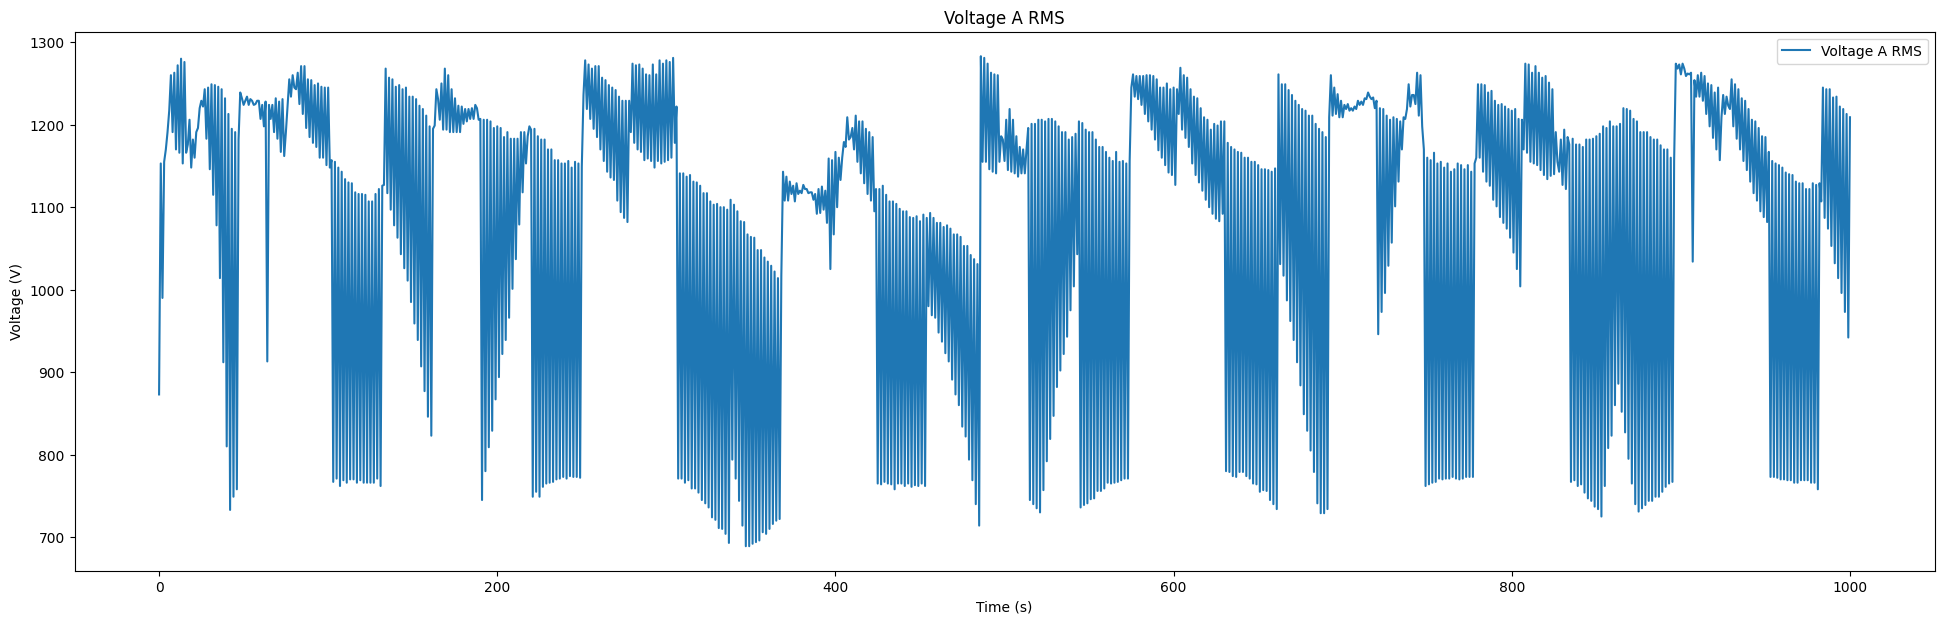

In [9]:
#print(average_voltage_a_rms_array[-1])
plt.figure(figsize=(24, 7))
plt.title('Voltage A RMS')
plt.plot(voltage_a_rms_array, label='Voltage A RMS')
#plt.plot(time_in_ms, voltage_a_rms_array, label='Voltage A RMS')
#plt.plot(time_in_ms, average_voltage_a_rms_array, label='Average Voltage A RMS')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

In [31]:
timestamp = time.strftime('%Y%m%d-%H%M%S')
with open(f"./data/{total_samples}-voltage_a_rms-{timestamp}.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Voltage A RMS', 'Average Voltage A RMS'])
    for index in range(total_samples):
        writer.writerow([voltage_a_rms_array[index], average_voltage_a_rms_array[index]])

print('Data exported to voltage_a_rms.csv')

Data exported to voltage_a_rms.csv
